In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

C:\Users\felip\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\felip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.style.use(["fast", "classic", "bmh", 'seaborn', "seaborn-dark"][0])
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

from matplotlib.cm import get_cmap

# cmap = get_cmap('gist_rainbow')
cmap = get_cmap('turbo')

rgba = cmap(0.5)
print(rgba)

(0.64362, 0.98999, 0.23356, 1.0)


In [3]:
test_gpt = {}
for k in range(1, 8):
    test_gpt[k] =  pd.read_excel(f"gpt_label_v{k}.xlsx")
    
dict_exp_gpt = {
    1: "zero-shot",
    2: "zero-shot+adv", 
    3: "zero-shot+adv+i",
    4: "one-shot",
    5: "few(2)-shot",
    6: "few(3)-shot",
    7: "few(4)-shot",
}

k = 1
o = test_gpt[k]
metrics_gpt = pd.DataFrame(classification_report(o["label"], o["gpt-label"], digits=4, output_dict=True))["0 1".split()]
metrics_gpt = metrics_gpt.reset_index().rename(columns={"index": "metric"})
metrics_gpt["model"] = dict_exp_gpt[k]
for k in range(2, 8):
    o = test_gpt[k]
    metricsk = pd.DataFrame(classification_report(o["label"], o["gpt-label"], digits=4, output_dict=True))["0 1".split()]
    metricsk = metricsk.reset_index().rename(columns={"index": "metric"})
    metricsk["model"] = dict_exp_gpt[k]
    
    metrics_gpt = pd.concat([metrics_gpt, metricsk])
metrics_gpt

,metric,0,1,model
0,precision,0.961957,0.261663,zero-shot
1,recall,0.327172,0.948529,zero-shot
2,f1-score,0.488276,0.410175,zero-shot
3,support,541.000000,136.000000,zero-shot
0,precision,0.962185,0.289294,zero-shot+adv
1,recall,0.423290,0.933824,zero-shot+adv
2,f1-score,0.587933,0.441739,zero-shot+adv
3,support,541.000000,136.000000,zero-shot+adv
0,precision,0.976879,0.261905,zero-shot+adv+i
1,recall,0.312384,0.970588,zero-shot+adv+i


In [4]:
test_bloomz = {}
for k in range(1, 5):
    test_bloomz[k] =  pd.read_excel(f"D:/github/coherence-prediction/bloomz_label_v{k}.xlsx")
    
dict_exp_bloomz = {
    1: "one-shot",
    2: "few(2)-shot",
    3: "few(3)-shot",
    4: "few(4)-shot",
}

k = 1
o = test_bloomz[k]
metrics_bloomz = pd.DataFrame(classification_report(o["label"], o["bloomz-label"], digits=4, output_dict=True))["0 1".split()]
metrics_bloomz = metrics_bloomz.reset_index().rename(columns={"index": "metric"})
metrics_bloomz["model"] = dict_exp_bloomz[k]
for k in range(2, 5):
    o = test_bloomz[k]
    metricsk = pd.DataFrame(classification_report(o["label"], o["bloomz-label"], digits=4, output_dict=True))["0 1".split()]
    metricsk = metricsk.reset_index().rename(columns={"index": "metric"})
    metricsk["model"] = dict_exp_bloomz[k]
    
    metrics_bloomz = pd.concat([metrics_bloomz, metricsk])
metrics_bloomz

,metric,0,1,model
0,precision,0.858553,0.249330,one-shot
1,recall,0.482440,0.683824,one-shot
2,f1-score,0.617751,0.365422,one-shot
3,support,541.000000,136.000000,one-shot
0,precision,0.878465,0.379808,few(2)-shot
1,recall,0.761553,0.580882,few(2)-shot
2,f1-score,0.815842,0.459302,few(2)-shot
3,support,541.000000,136.000000,few(2)-shot
0,precision,0.899772,0.386555,few(3)-shot
1,recall,0.730129,0.676471,few(3)-shot


In [5]:
test_blooml = {}
for k in range(1, 3):
    test_blooml[k] =  pd.read_excel(f"bloom_label_v{k}.xlsx")
    
dict_exp_blooml = {
    1: "zero-shot",
    2: "zero-shot+adv",
}

k = 1
o = test_blooml[k]
metrics_blooml = pd.DataFrame(classification_report(o["label"], o["bloom-label"], digits=4, output_dict=True))["0 1".split()]
metrics_blooml = metrics_blooml.reset_index().rename(columns={"index": "metric"})
metrics_blooml["model"] = dict_exp_blooml[k]
for k in range(2, 3):
    o = test_blooml[k]
    metricsk = pd.DataFrame(classification_report(o["label"], o["bloom-label"], digits=4, output_dict=True))["0 1".split()]
    metricsk = metricsk.reset_index().rename(columns={"index": "metric"})
    metricsk["model"] = dict_exp_blooml[k]
    
    metrics_blooml = pd.concat([metrics_blooml, metricsk])
metrics_blooml

,metric,0,1,model
0,precision,0.500000,0.195489,zero-shot
1,recall,0.011091,0.955882,zero-shot
2,f1-score,0.021700,0.324594,zero-shot
3,support,541.000000,136.000000,zero-shot
0,precision,0.782609,0.199683,zero-shot+adv
1,recall,0.066543,0.926471,zero-shot+adv
2,f1-score,0.122658,0.328553,zero-shot+adv
3,support,541.000000,136.000000,zero-shot+adv


In [6]:
othersC1 = {
    "dummy_most_frequent": 0.00,
    "dummy_stratified": .1545,
    "dummy_uniform": .3060,
    "YouChat (zero-shot)": 0.5079,
    "Rule-based": 0.5776, 
    "XGBoost+Mix": 0.7220,    
    "General (XGBoost)": 0.7761,
    "BETO mt": 0.7915,
}

othersC0 = {
    "dummy_most_frequent": .8883,
    "dummy_stratified": .8360,
    "dummy_uniform": .6382,
    "YouChat (zero-shot)": 0.7082,
    "Rule-based": 0.9227, 
    "XGBoost+Mix": 0.9838,    
    "General (XGBoost)": 0.9903,
    "BETO mt": 0.9759,
}

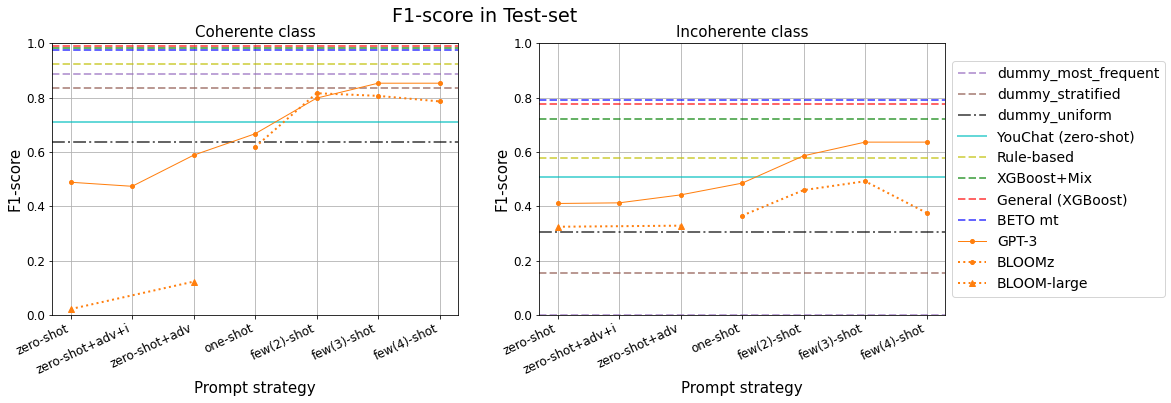

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(8*2, 5))
for cc in [0, 1]:
    for i, (k, v) in enumerate([othersC0, othersC1][cc].items()):
        if i == 2: #unif
            ax[cc].axhline(y = v,color = ["tab:purple", "tab:brown", "k", "c", "y", "g", "r", "b"][i], alpha=0.6, linewidth=2, linestyle = '-.', label=k)
        elif i==3: #youchat
            ax[cc].axhline(y = v,color = ["tab:purple", "tab:brown", "k", "c", "y", "g", "r", "b"][i], alpha=0.6, linewidth=2, linestyle = '-', label=k)
        else:
            ax[cc].axhline(y = v,color = ["tab:purple", "tab:brown", "k", "c", "y", "g", "r", "b"][i], alpha=0.6, linewidth=2, linestyle = '--', label=k)


    c="tab:orange" if cc == 1 else "tab:orange"
    t = metrics_gpt[metrics_gpt["metric"] == "f1-score"].sort_values("1")[f"model {cc}".split()]
    ax[cc].plot(t["model"], t[str(cc)], color=c, label="GPT-3", marker="o", markersize=4, linewidth=1, linestyle="-")

    t = metrics_bloomz[metrics_bloomz["metric"] == "f1-score"][f"model {cc}".split()]
    ax[cc].plot(t["model"], t[str(cc)], color=c, label="BLOOMz", marker="o", markersize=4, linewidth=2, linestyle=":")

    t = metrics_blooml[metrics_blooml["metric"] == "f1-score"][f"model {cc}".split()]
    ax[cc].plot(t["model"], t[str(cc)], color=c, label="BLOOM-large", marker="^", markersize=6, linewidth=2, linestyle=":")
    title = "Incoherente class" if cc == 1 else "Coherente class"
    ax[cc].set_title(title, size=15)
    ax[cc].set_ylabel("F1-score", size=15)
    ax[cc].set_xlabel("Prompt strategy", size=15)
    ax[cc].set_ylim(0, 1);
#     ax[cc].set_xticks(ax[cc].get_xticks(), rotation=25, ha='right');
    ax[cc].grid(True);
    plt.setp(ax[cc].get_xticklabels(), rotation=25, ha='right')
    
ax[1].legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle("F1-score in Test-set");